In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("movies.csv")

In [3]:
df.head()

,index,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
0,1.0,The Godfather,(1972),R,175 min,"Crime, Drama",9.2,"1,860,471",$134.97M
1,2.0,The Silence of the Lambs,(1991),R,118 min,"Crime, Drama, Thriller",8.6,"1,435,344",$130.74M
2,3.0,Star Wars: Episode V - The Empire Strikes Back,(1980),PG,124 min,"Action, Adventure, Fantasy",8.7,"1,294,805",$290.48M
3,4.0,The Shawshank Redemption,(1994),R,142 min,Drama,9.3,"2,683,302",$28.34M
4,5.0,The Shining,(1980),R,146 min,"Drama, Horror",8.4,"1,025,560",$44.02M


In [4]:
df.shape

(99, 9)

In [5]:
df.info

<bound method DataFrame.info of     index                                      movie_name year_of_release  \
0     1.0                                   The Godfather          (1972)   
1     2.0                        The Silence of the Lambs          (1991)   
2     3.0  Star Wars: Episode V - The Empire Strikes Back          (1980)   
3     4.0                        The Shawshank Redemption          (1994)   
4     5.0                                     The Shining          (1980)   
..    ...                                             ...             ...   
94   95.0                              The Usual Suspects          (1995)   
95   96.0                                  Cool Hand Luke          (1967)   
96   97.0           Eternal Sunshine of the Spotless Mind          (2004)   
97   98.0                                     City Lights          (1931)   
98   99.0                                      The Matrix          (1999)   

   category run_time                       

In [6]:
df.describe()

,index,imdb_rating
count,99.000000,99.000000
mean,50.000000,8.348485
std,28.722813,0.368772
min,1.000000,7.200000
25%,25.500000,8.100000
50%,50.000000,8.300000
75%,74.500000,8.600000
max,99.000000,9.300000


In [7]:
df.columns

Index(['index', 'movie_name', 'year_of_release', 'category', 'run_time',
       'genre', 'imdb_rating', 'votes', 'gross_total'],
      dtype='object')

In [8]:
df.isnull()

,index,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
94,False,False,False,False,False,False,False,False,False
95,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().any()

index              False
movie_name         False
year_of_release    False
category           False
run_time           False
genre              False
imdb_rating        False
votes              False
gross_total         True
dtype: bool

In [10]:
df.isnull().sum()

index              0
movie_name         0
year_of_release    0
category           0
run_time           0
genre              0
imdb_rating        0
votes              0
gross_total        1
dtype: int64

## 📊EDA 📊

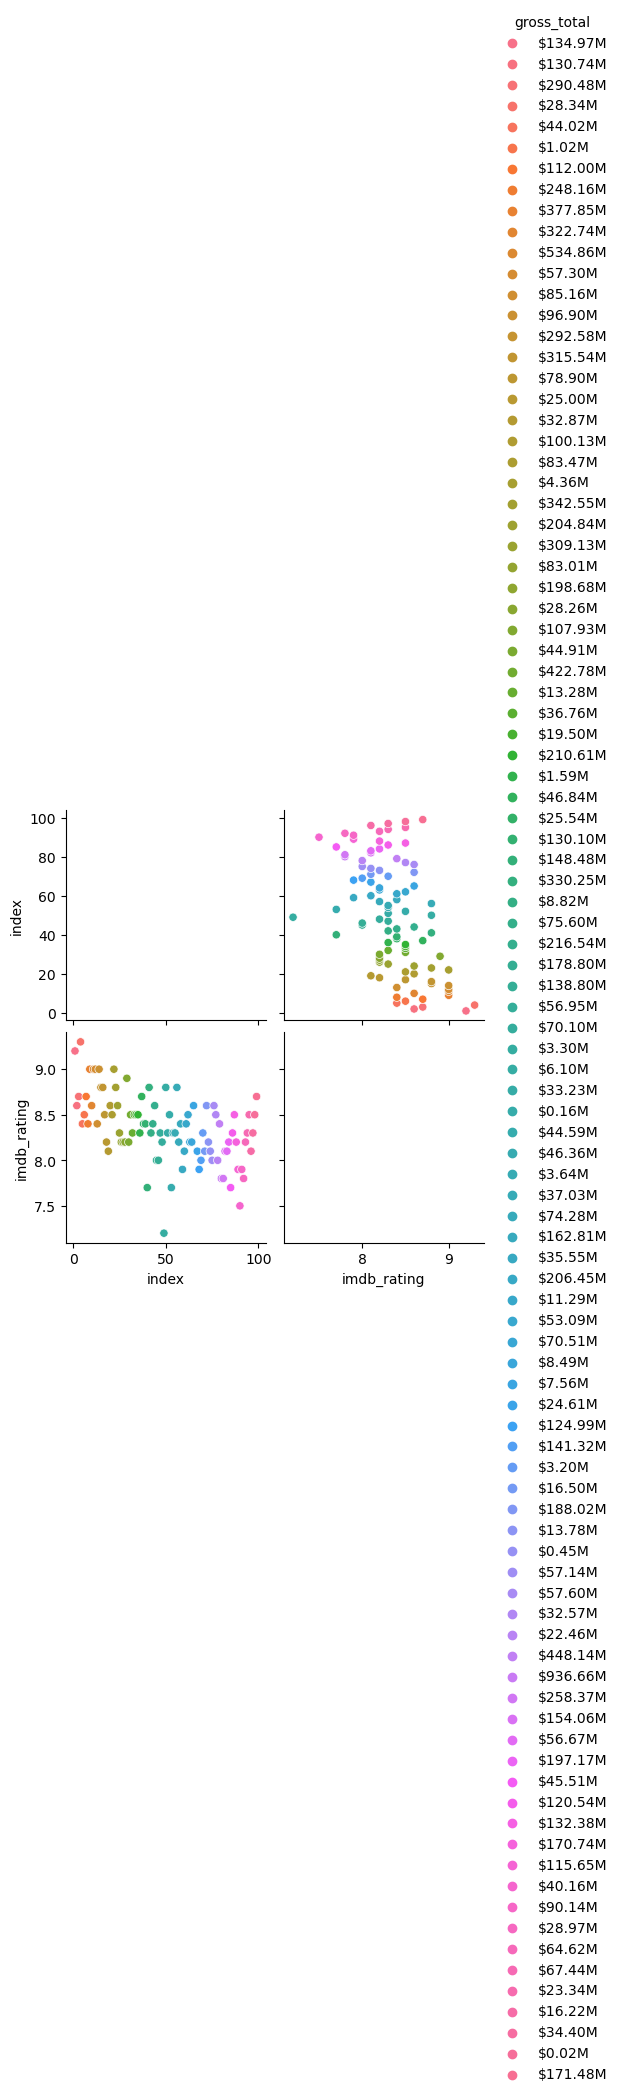

In [11]:
sns.pairplot(df, hue = "gross_total")

array([<AxesSubplot: ylabel='category'>], dtype=object)

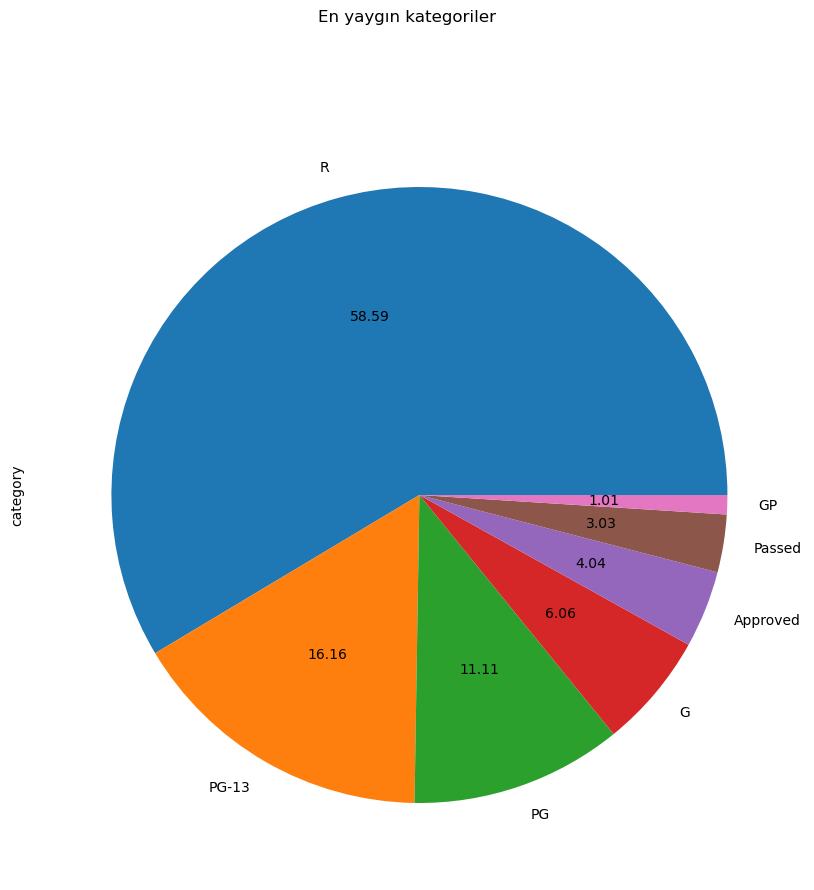

In [12]:
df["category"].value_counts().plot(kind = "pie",
                                    subplots = True,
                                    autopct = "%1.2f",
                                    figsize = (10,10),
                                    title = "En yaygın kategoriler")

In [13]:
df["gross_total"] = df["gross_total"].astype(str).str.lstrip("$").str.rstrip("M")

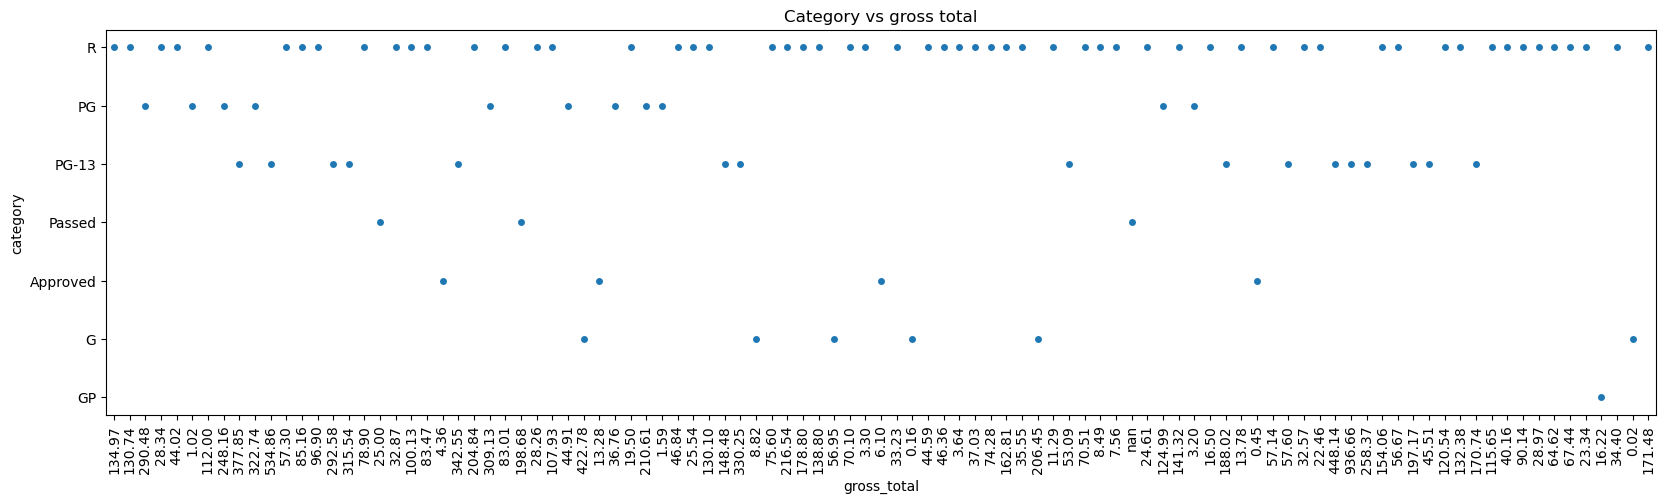

In [14]:
fig, ax = plt.subplots(figsize=(20,5))
plt.xticks(rotation=90)
ax = sns.stripplot(y="category", x="gross_total", data=df).set(title="Category vs gross total")

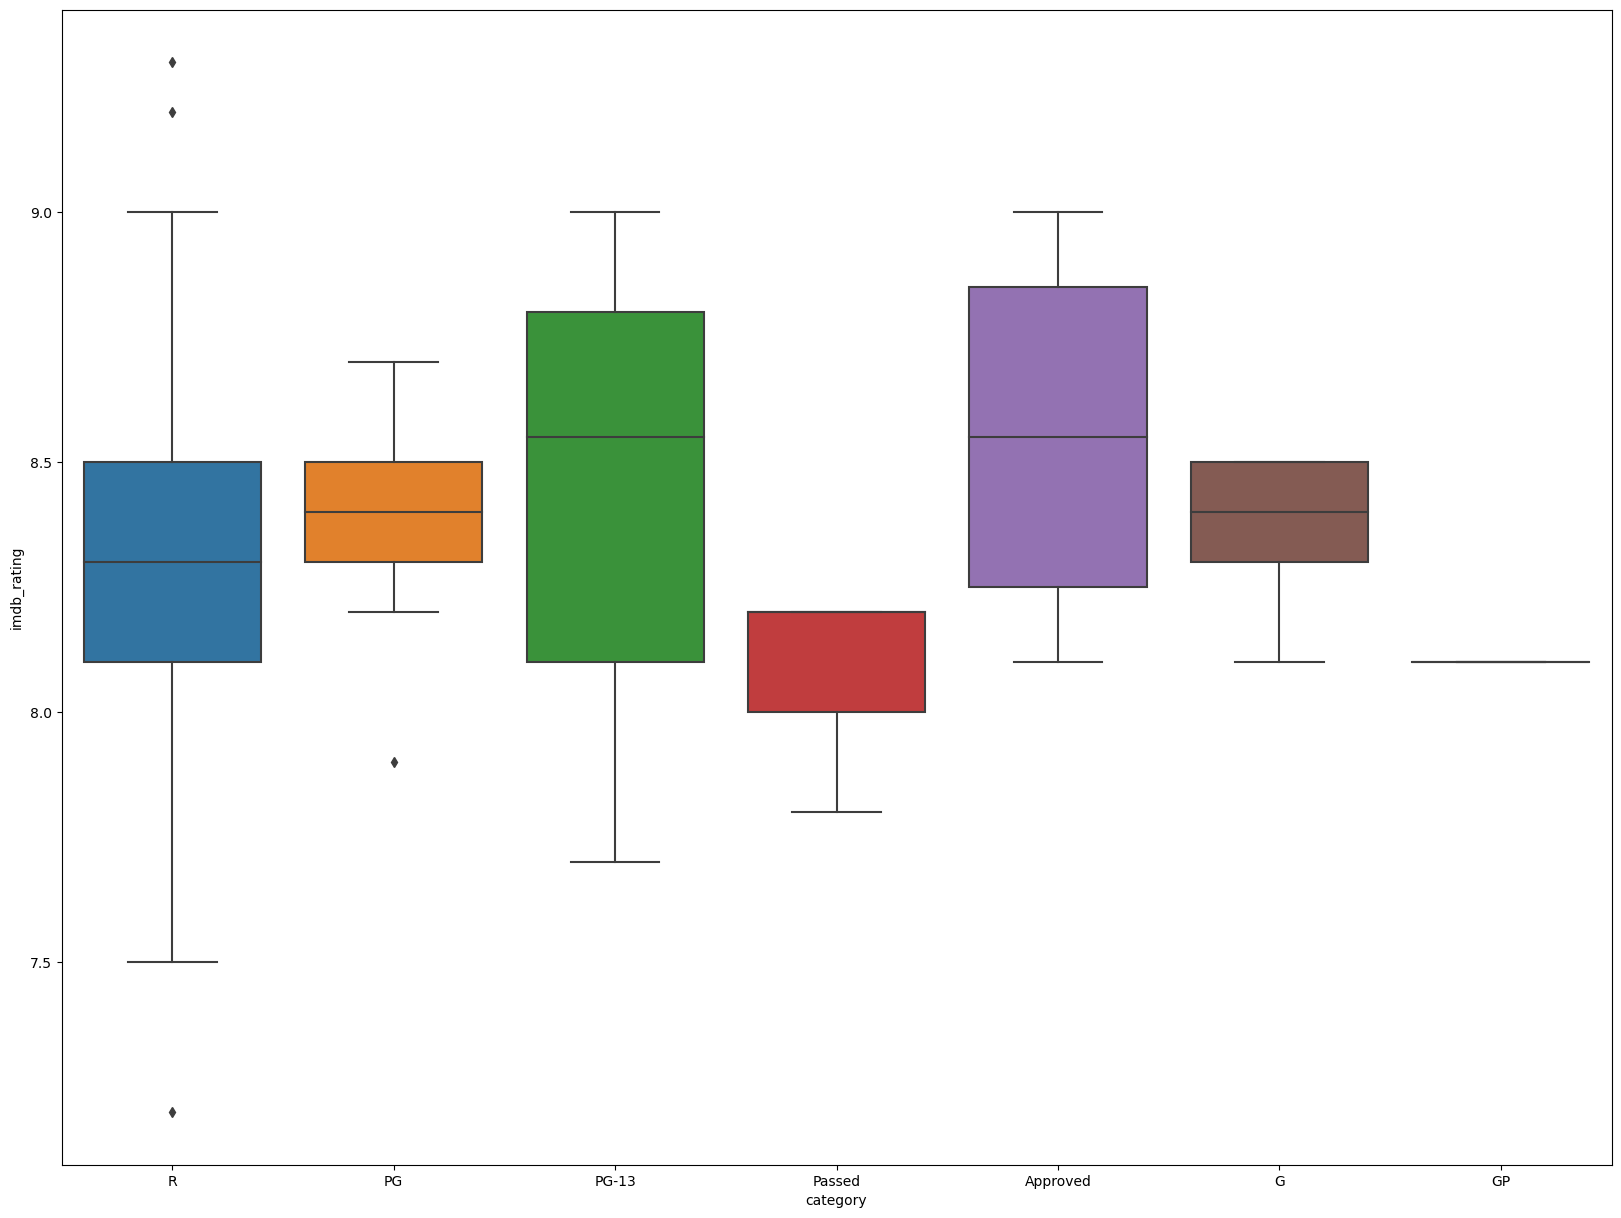

In [15]:
fig, ax = plt.subplots(figsize=(20,15))
#plt.xticks(rotation=0)
ax = sns.boxplot(x="category", y="imdb_rating", data=df)

array([<AxesSubplot: ylabel='genre'>], dtype=object)

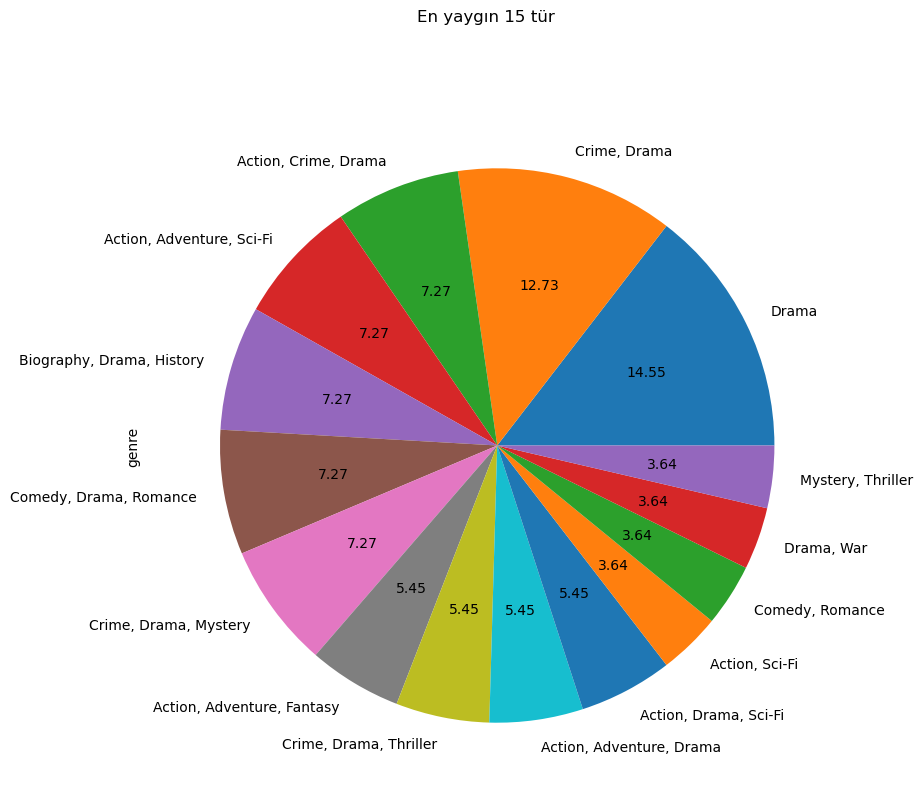

In [16]:
df["genre"].value_counts().head(15).plot(kind = "pie", 
                                         subplots = True, 
                                         autopct = "%1.2f",
                                         figsize = (9,9),
                                         title= "En yaygın 15 tür")

array([[<AxesSubplot: title={'center': 'index'}>,
        <AxesSubplot: title={'center': 'imdb_rating'}>]], dtype=object)

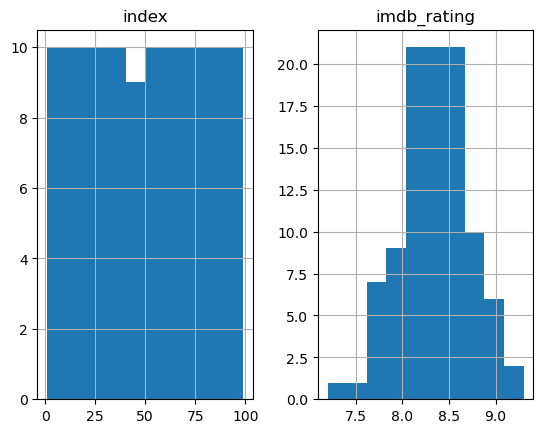

In [17]:
df.hist()

[Text(0.5, 1.0, 'IMDB PUANLARI')]

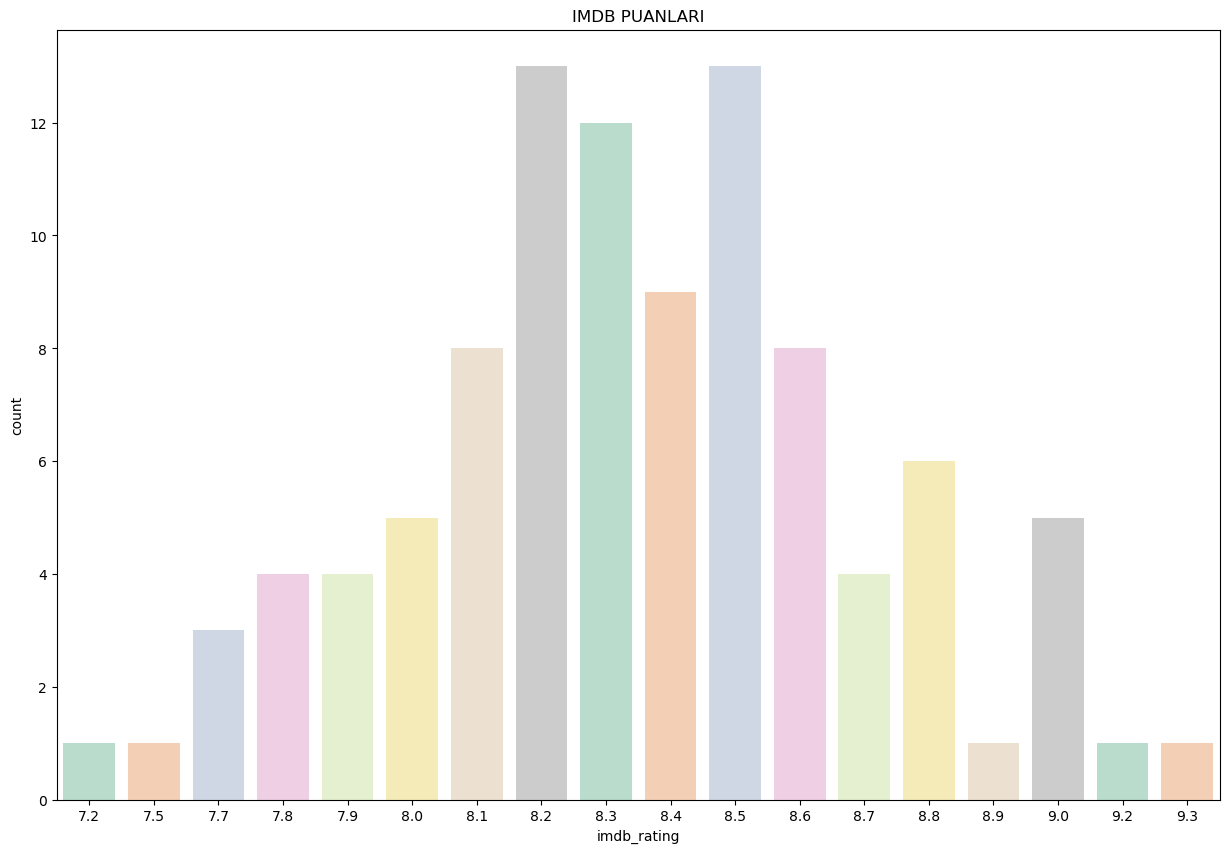

In [18]:
plt.figure(figsize=(15,10))
sns.countplot(data=df, x="imdb_rating", palette="Pastel2").set(title="IMDB PUANLARI")

In [19]:
print(df["imdb_rating"])
print("\nimdb ortalaması = ", df["imdb_rating"].mean())

0     9.2
1     8.6
2     8.7
3     9.3
4     8.4
     ... 
94    8.5
95    8.1
96    8.3
97    8.5
98    8.7
Name: imdb_rating, Length: 99, dtype: float64

imdb ortalaması =  8.34848484848485


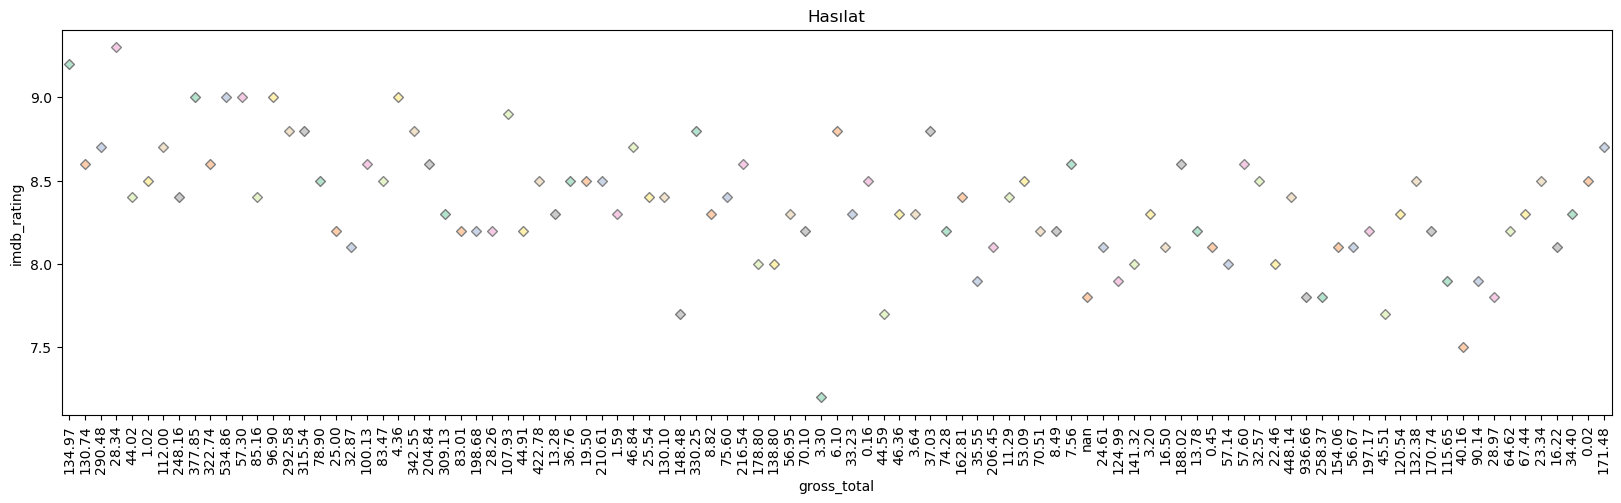

In [20]:
fig, ax = plt.subplots(figsize=(20,5))
plt.xticks(rotation=90)
ax = sns.stripplot(y="imdb_rating", 
                   x="gross_total", 
                   data=df,palette="Pastel2", 
                   marker="D",
                   linewidth=1,
                   alpha=1).set(title="Hasılat")

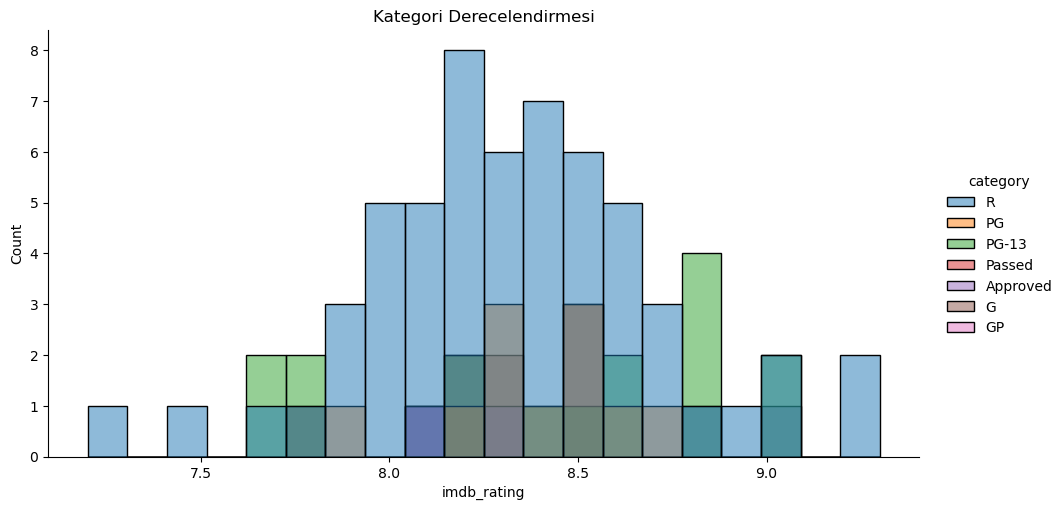

In [21]:
sns.displot(df, x="imdb_rating", bins=20, hue="category", aspect=1.9).set(title="Kategori Derecelendirmesi")

In [22]:
df["year_of_release"] = df["year_of_release"].str.replace("\(|\)","")

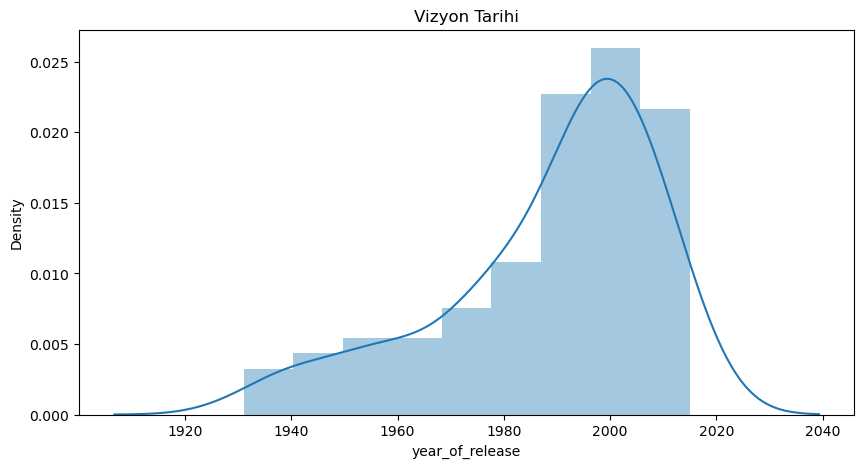

In [23]:
plt.figure(figsize=(10,5))
sns.distplot(df["year_of_release"])
plt.title("Vizyon Tarihi")
plt.show()

In [24]:
df["run_time"] = df["run_time"].apply(lambda x: float(x.split()[0].replace("min","")))

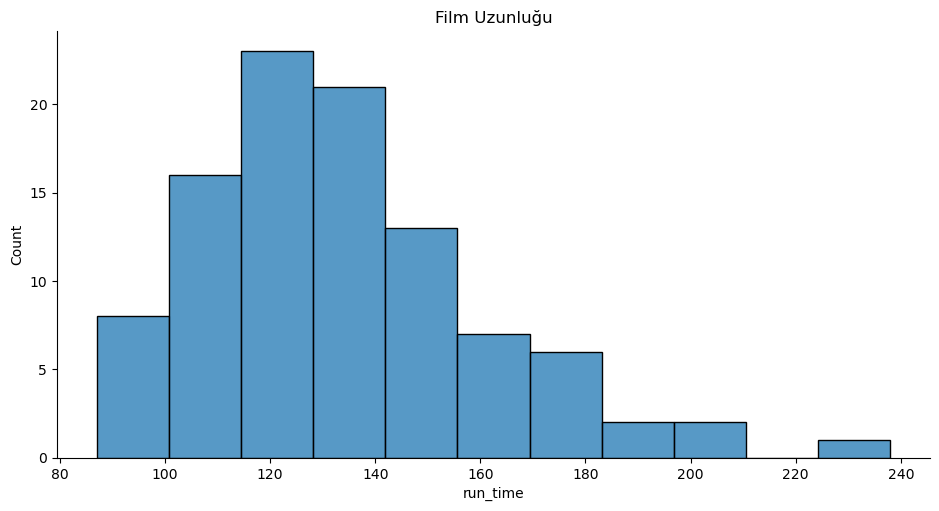

In [25]:
sns.displot(df, x= 'run_time', aspect=1.9)
plt.title("Film Uzunluğu")
plt.show()

In [31]:
filtre = df[df["run_time"] > 200.0][["movie_name","run_time"]]
filtre

,movie_name,run_time
8,The Lord of the Rings: The Return of the King,201.0
11,The Godfather: Part II,202.0
26,Gone with the Wind,238.0


In [32]:
uzunluk = df["run_time"].values
uzunluk.sort()
uzunluk

array([ 87.,  87.,  88.,  93.,  93.,  96.,  98., 100., 102., 102., 102.,
       103., 106., 107., 108., 109., 109., 110., 111., 111., 112., 112.,
       113., 114., 115., 116., 116., 116., 117., 117., 118., 118., 119.,
       120., 120., 121., 121., 121., 122., 122., 122., 124., 127., 127.,
       127., 127., 128., 129., 130., 130., 130., 131., 132., 132., 133.,
       133., 134., 135., 136., 136., 137., 137., 137., 138., 138., 138.,
       139., 139., 142., 142., 144., 145., 146., 147., 148., 149., 150.,
       151., 152., 153., 154., 157., 161., 161., 164., 165., 169., 169.,
       170., 175., 178., 178., 178., 179., 188., 195., 201., 202., 238.])

<function matplotlib.pyplot.show(close=None, block=None)>

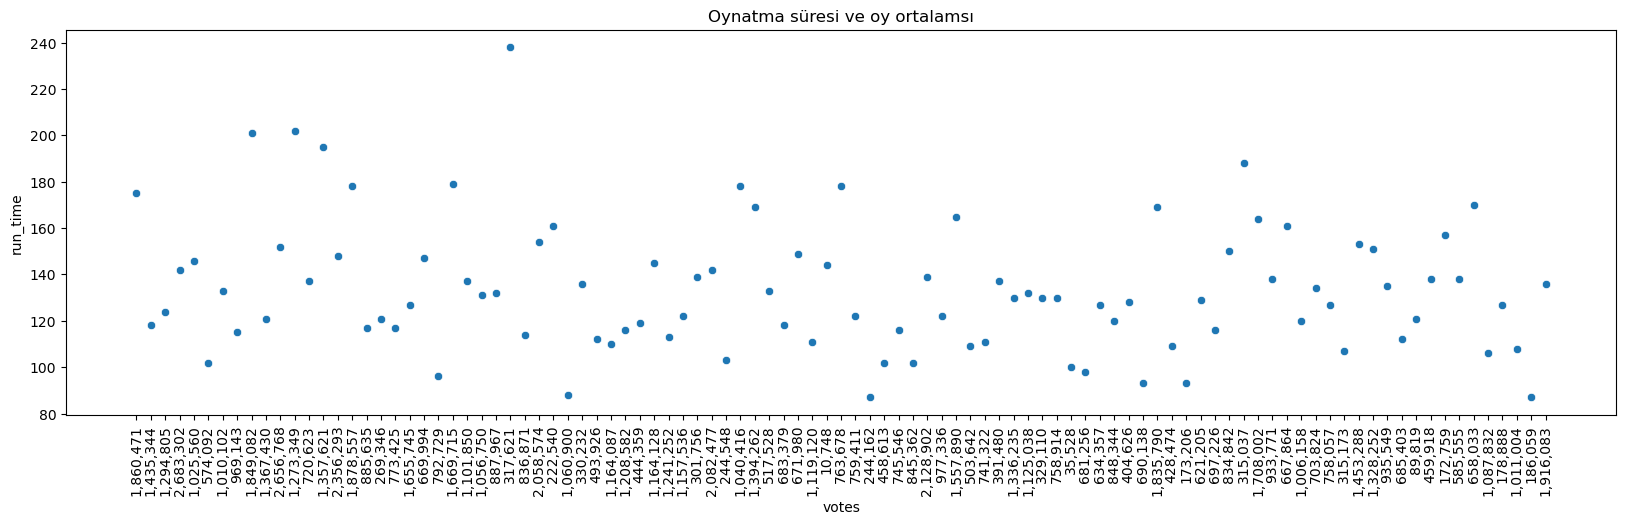

In [26]:
plt.figure(figsize=(20,5))
sns.scatterplot(x=df["votes"], y=df["run_time"])
plt.title("Oynatma süresi ve oy ortalamsı")
plt.xticks(rotation=90)
plt.show

<AxesSubplot: xlabel='genre'>

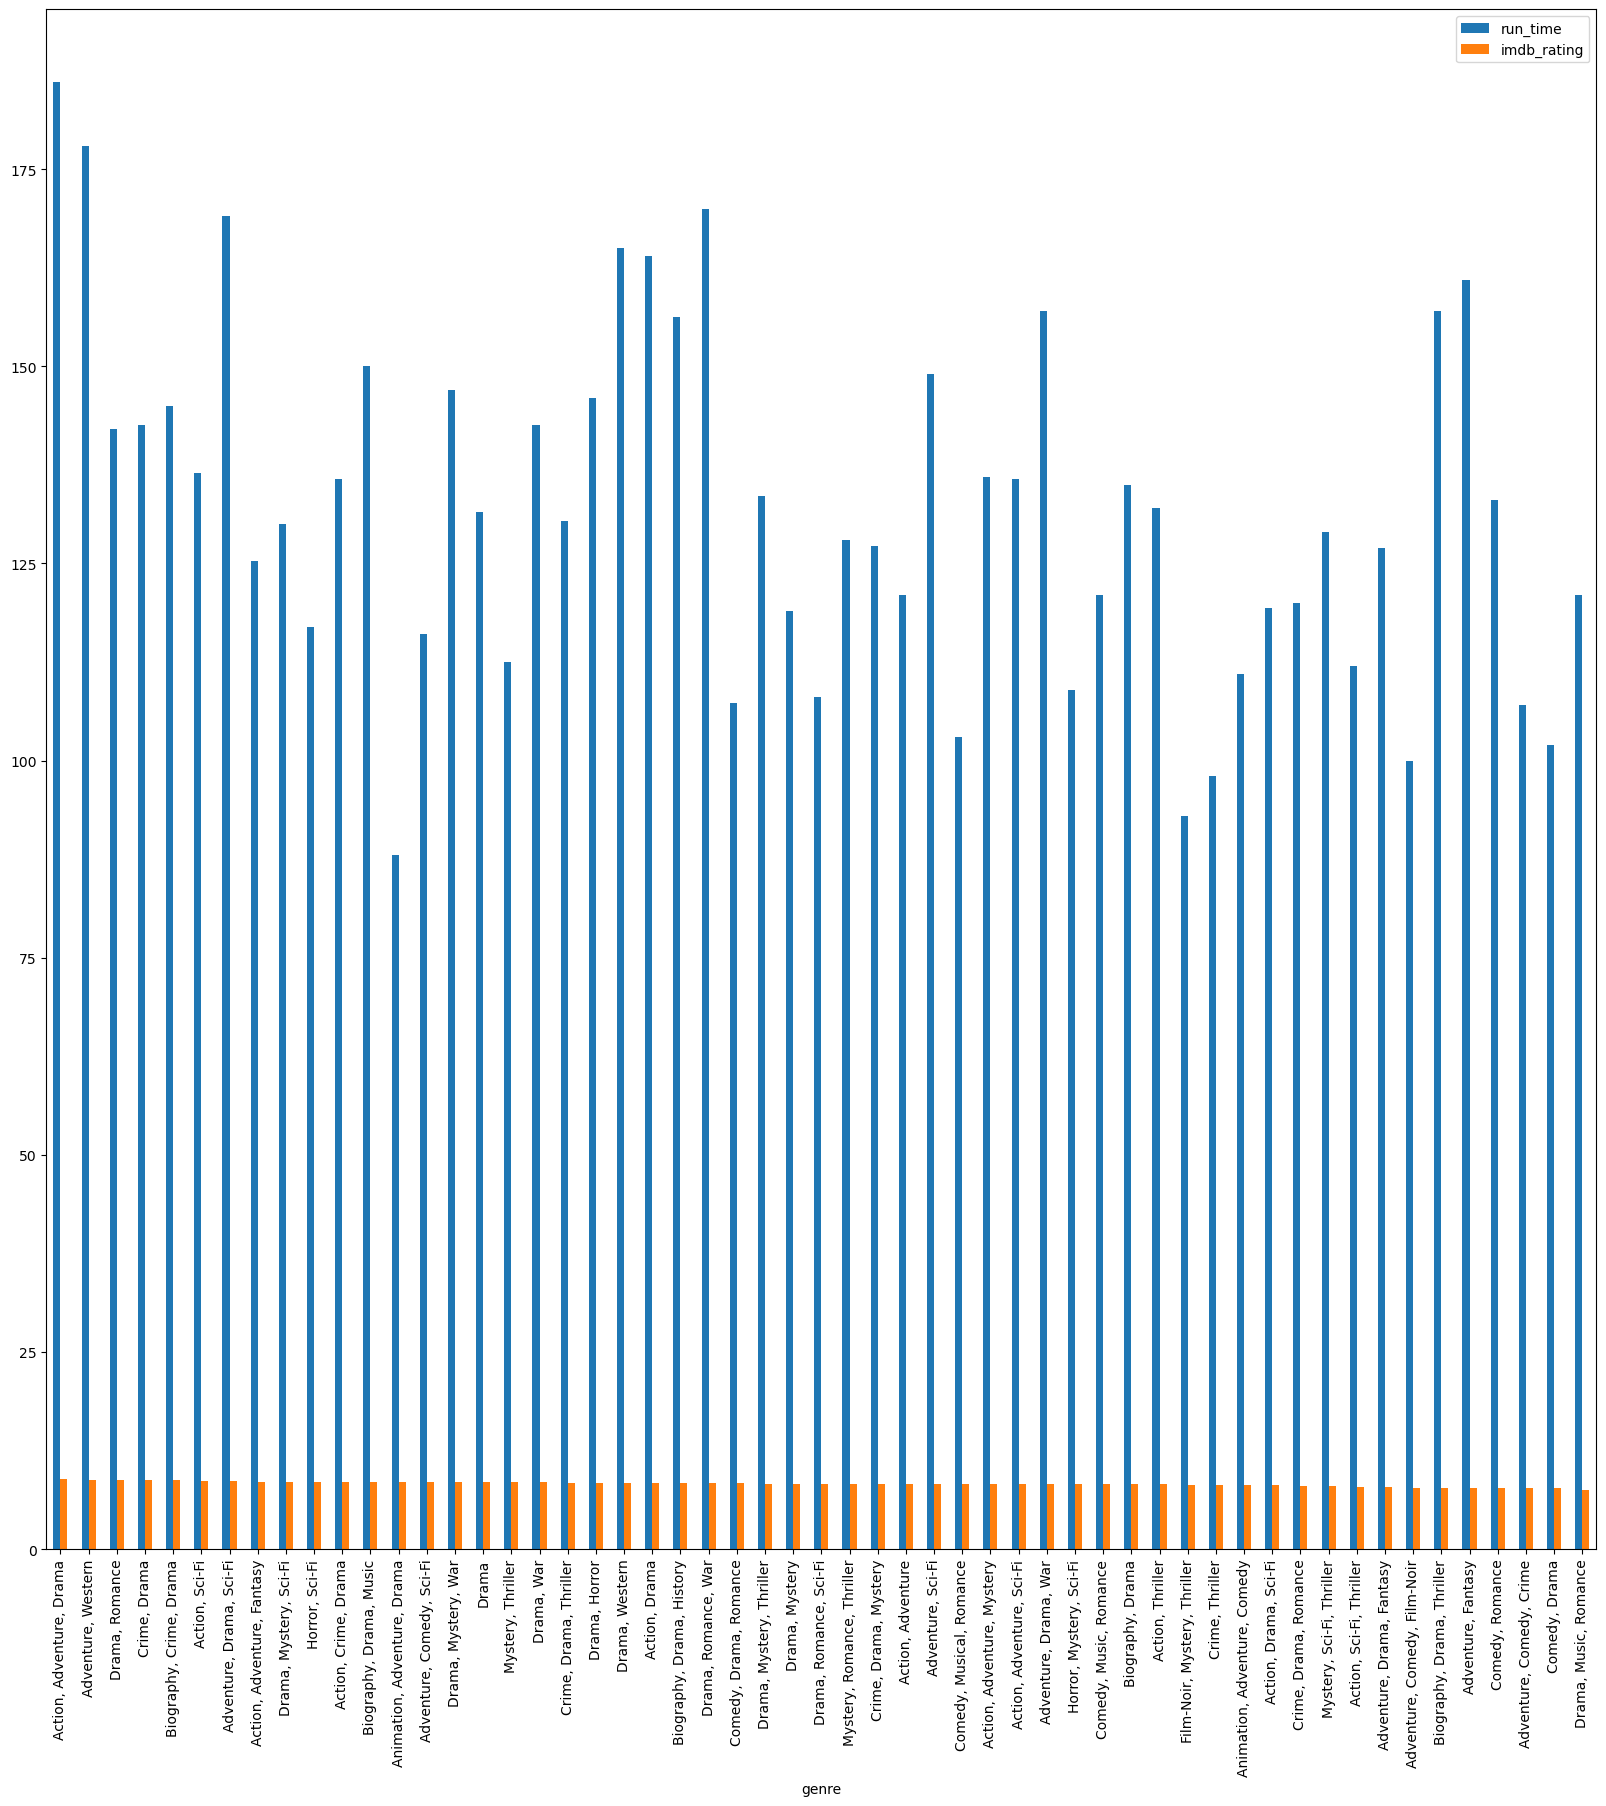

In [27]:
df.groupby("genre")["run_time", "imdb_rating"].agg("mean").sort_values(by="imdb_rating", ascending=False).plot(kind="bar",figsize=(20,20))